<a href="https://colab.research.google.com/github/JohenPerera123/Real_World_Project_-for_REPORT/blob/main/Real_World_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
file = "/content/drive/MyDrive/student_lifestyle_dataset.csv"

In [ ]:
df = pd.read_csv(file)
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

### Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Student_ID, Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, GPA, Stress_Level]
Index: []


In [ ]:
df.describe()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max              10.000000              6.000000   

       Physical_Activity_Hours_Per_Day          GPA  
count                       2000.00000  2000.000000  
mean                           4.32830     3.115960  
std                            2.51411     0.298674  
min                            0.00000     2.240000  
25%                            2.40000     2.900000  
50%                            4.10000     3.110000  
75%                            6.10000     3.330000  
max                           13.00000     4.000000

### Outlier Detection

I will use the Interquartile Range (IQR) method to detect outliers in the numerical columns of the DataFrame. This method is robust to skewed distributions and is a common approach for outlier identification.

In [ ]:
numcols = df.select_dtypes(include='number')
print(numcols)
q1 = numcols.quantile(0.25)
q3 = numcols.quantile(0.75)
IQR = q3 - q1
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
outliars = ((numcols< (q1 - 1.5*IQR)) | (numcols> (q3+ 1.5*IQR)))
print("Outliers")
print(df[outliars.any(axis=1)])

      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

### Visualizing Distributions with Box Plots

I will now create box plots for each numerical column (`Student_ID`) to visualize their distributions, spread, and the presence of outliers. This provides a quick overview of the data's central tendency and variability.

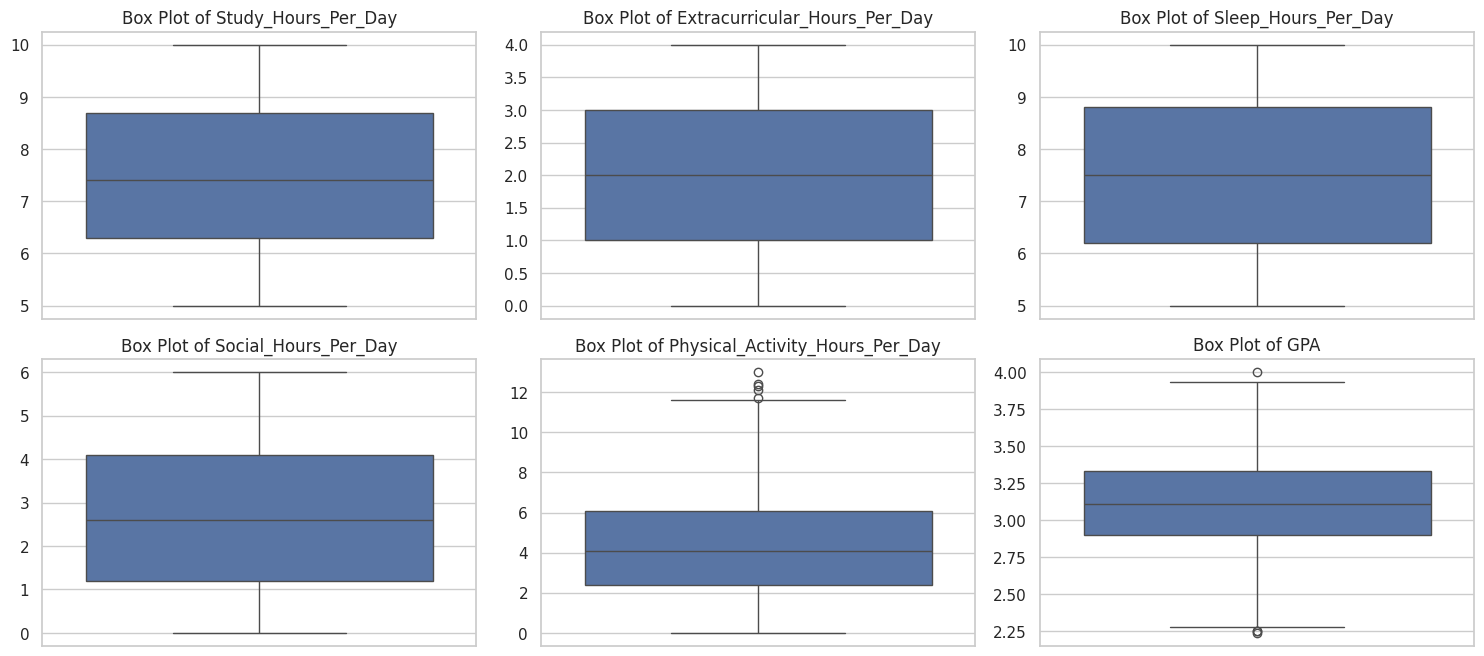

In [ ]:
numerical_cols_to_plot = df.select_dtypes(include=np.number).columns.drop('Student_ID', errors='ignore')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter
plt.tight_layout()
plt.show()

In [ ]:
df['Physical_Activity_Hours_Per_Day'] = df['Physical_Activity_Hours_Per_Day'].where(df['Physical_Activity_Hours_Per_Day'] <= upper_bound['Physical_Activity_Hours_Per_Day'], upper_bound['Physical_Activity_Hours_Per_Day'])

In [ ]:
print("Outliers")
print(df[outliars.any(axis=1)])

Outliers
      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
51            52                  9.0                            2.6   
62            63                  5.1                            0.5   
171          172                  5.1                            0.3   
331          332                  5.1                            1.0   
764          765                  5.5                            1.8   
784          785                  5.1                            0.3   
1174        1175                  5.3                            0.3   
1574        1575                  5.3                            2.4   
1715        1716                  5.4                            0.2   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
51                    8.5                   3.1   
62                    5.2                   0.2   
171                   6.0                   0.2   
331                   8.8                   0.8   
764            

In [ ]:
plt.show()

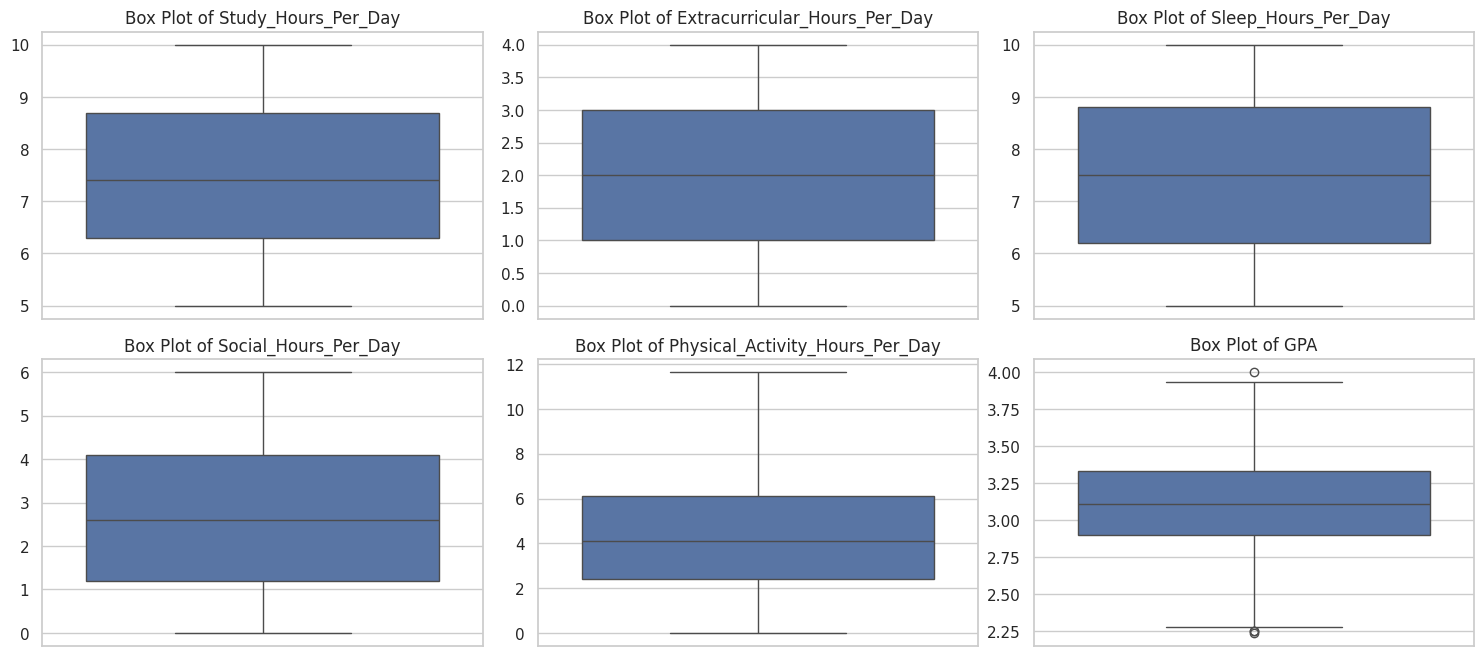

In [ ]:
numerical_cols_to_plot = df.select_dtypes(include=np.number).columns.drop('Student_ID', errors='ignore')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter
plt.tight_layout()
plt.show()

In [ ]:
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

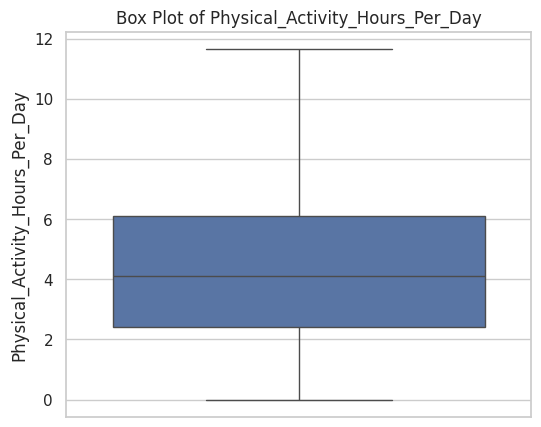

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Physical_Activity_Hours_Per_Day'])
plt.title('Box Plot of Physical_Activity_Hours_Per_Day')
plt.ylabel('Physical_Activity_Hours_Per_Day')
plt.show()

### Counting Outliers per Attribute

I will now calculate and display the number of outliers for each numerical attribute (excluding 'Student_ID') based on the IQR method.

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.drop('Student_ID', errors='ignore')

print("--- Outlier Counts per Attribute (Excluding Student_ID) ---")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {outliers_count} outliers")


--- Outlier Counts per Attribute (Excluding Student_ID) ---
Study_Hours_Per_Day: 0 outliers
Extracurricular_Hours_Per_Day: 0 outliers
Sleep_Hours_Per_Day: 0 outliers
Social_Hours_Per_Day: 0 outliers
Physical_Activity_Hours_Per_Day: 0 outliers
GPA: 4 outliers


### Handling duplicates

In [ ]:
duplicates= df.duplicated()
print("Duplicate rows",df[duplicates])

Duplicate rows Empty DataFrame
Columns: [Student_ID, Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, GPA, Stress_Level]
Index: []


In [ ]:
df.drop_duplicates(inplace=True)

# Task
Prepare the features (all columns except 'Student_ID' and 'GPA') and the target variable ('GPA') from the dataset. Then, apply one-hot encoding to the 'Stress_Level' categorical column within the features, and display the first five rows of the resulting feature DataFrame.

## Prepare Features and Target

### Subtask:
Separate the dataset into features (X) and the target variable (y), which is 'GPA'. Ensure 'Student_ID' is dropped from features as it's an identifier.


**Reasoning**:
I will separate the DataFrame into features (X) and the target variable (y), which is 'GPA', dropping 'Student_ID' from the features as it's an identifier. Then, I will display the first few rows of both X and y to verify the separation.



In [ ]:
X = df.drop(['Student_ID', 'GPA'], axis=1)
y = df['GPA']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
0                  6.9                            3.8                  8.7   
1                  5.3                            3.5                  8.0   
2                  5.1                            3.9                  9.2   
3                  6.5                            2.1                  7.2   
4                  8.1                            0.6                  6.5   

   Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day Stress_Level  
0                   2.8                              1.8     Moderate  
1                   4.2                              3.0          Low  
2                   1.2                              4.6          Low  
3                   1.7                              6.5     Moderate  
4                   2.2                              6.6         High  

Target (y):
0    2.99
1    2.75
2    2.67
3    2.88
4    3.51
Name: GPA, dtype: floa

## Final Task

### Subtask:
Confirm that the features are ready for model training and provide a summary of the feature engineering steps performed.


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully separated into features (\`X\`) and the target variable (\`y\`), where \`y\` represents 'GPA'.
*   The 'Student\_ID' column, being an identifier, and 'GPA' were excluded from the features DataFrame (\`X\`).
*   The categorical feature 'Stress\_Level' in the features DataFrame (\`X\`) was successfully transformed using one-hot encoding. This resulted in two new binary columns, 'Stress\_Level\_Low' and 'Stress\_Level\_Moderate', effectively representing the different stress levels while avoiding multicollinearity by dropping the first category.

### Insights or Next Steps

*   The features are now preprocessed and ready for input into a machine learning model, as categorical variables have been appropriately handled.
*   The next step would typically involve splitting the data into training and testing sets, followed by model selection, training, and evaluation.


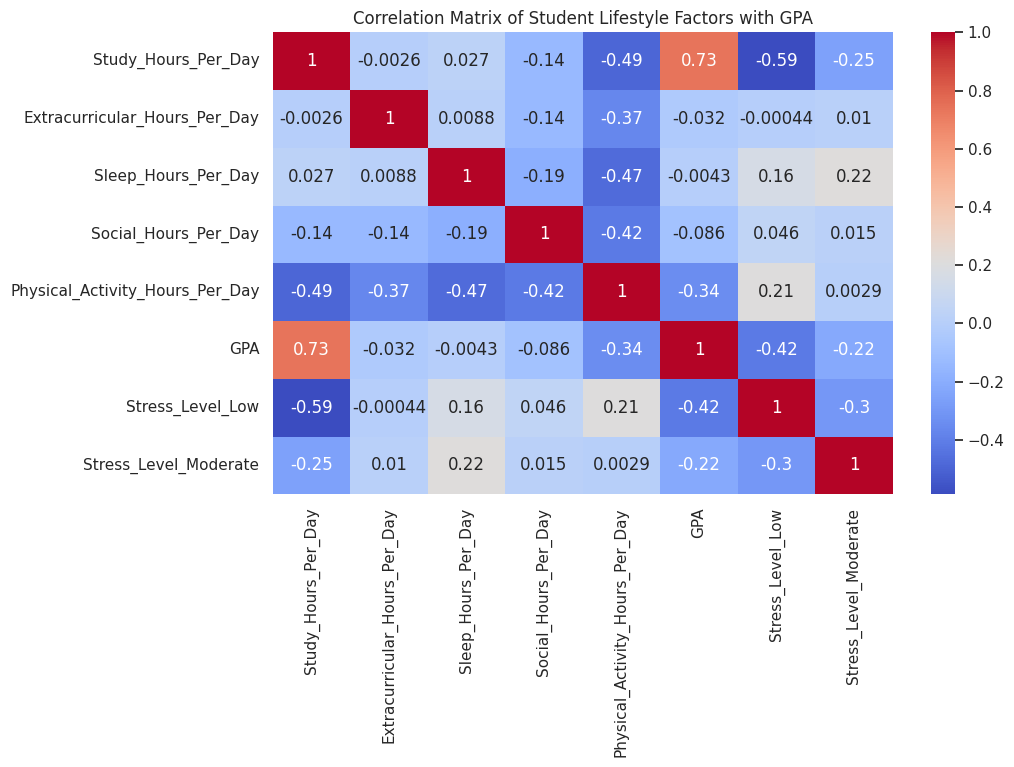

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of the dataframe to avoid modifying the original 'df'
df_for_corr = df.copy()

# Drop 'Student_ID' as it's an identifier and not relevant for correlation
df_for_corr = df_for_corr.drop('Student_ID', axis=1)

# One-hot encode the 'Stress_Level' categorical column
df_for_corr = pd.get_dummies(df_for_corr, columns=['Stress_Level'], drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(df_for_corr.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Student Lifestyle Factors with GPA')
plt.show()

In [ ]:
# Map Stress_Level to numerical values to allow for arithmetic operations
stress_level_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_level_mapping)

# Now calculate the ratio using the numerical stress level
df["study_stress_ratio"] = df["Study_Hours_Per_Day"] / (df["Stress_Level_Numeric"] + 1)
df['Total_Activity_Hours'] = df['Extracurricular_Hours_Per_Day'] + df['Social_Hours_Per_Day'] + df['Physical_Activity_Hours_Per_Day']
# Create a ratio of study hours to sleep hours
df['Study_to_Sleep_Ratio'] = df['Study_Hours_Per_Day'] / df['Sleep_Hours_Per_Day']
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  Stress_Level_Numeric  study_stress_ratio  \
0  2.99     Moderate                     2            2.300000   
1  2.75          Low                     1            2.650000   
2  2.67          Low                     1            2.550000   
3  2.88     Moderate                     2            2.166667   
4  3.51         High                     3            2.025000   

   Total_Activity_Hours  Study_to_Sleep_Ratio  
0                   8.4              0.793103  
1                  10.7              0.662500  
2                   9.7              0.554348  
3                  10.3              0.902778  
4                   9.4              1.246154

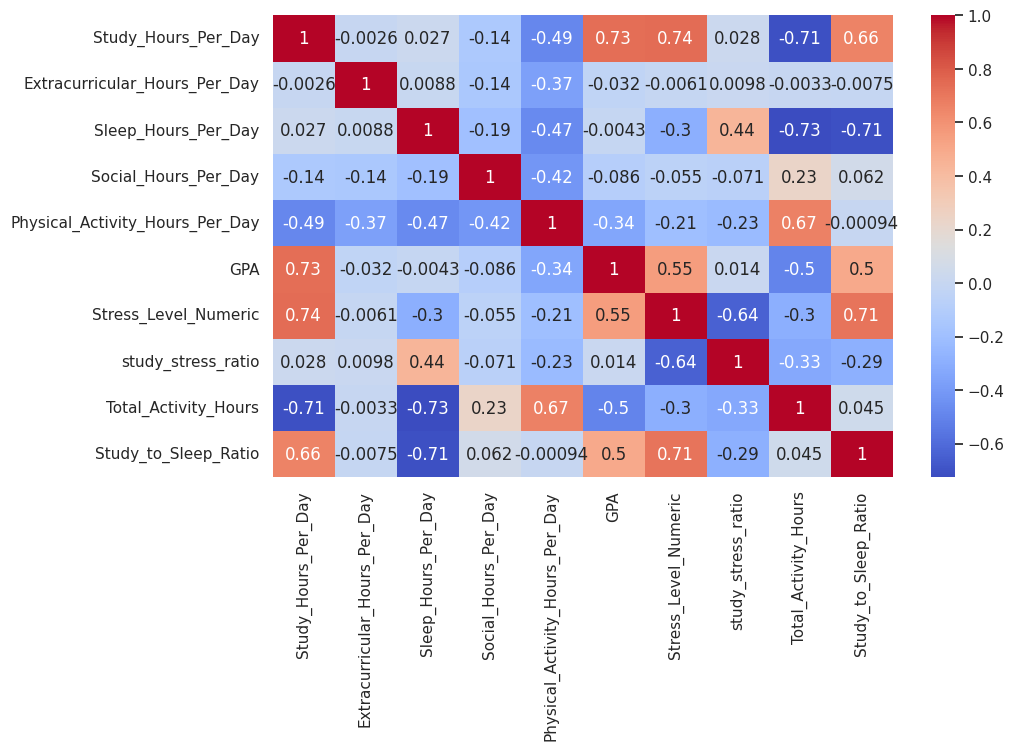

In [ ]:
df = df.drop('Student_ID', axis=1)
df = df.drop('Stress_Level', axis=1)

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
# Define the list of columns to be dropped
columns_to_drop = ['Social_Hours_Per_Day','Extracurricular_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)

print(f"\nColumns dropped: {columns_to_drop}")
print("\nNew columns after dropping:")
print(df.columns.tolist())
print(f"\nShape of the new dataset: {df.shape}")

# Display the first few rows of the modified DataFrame
print("\nFirst 5 rows of the dataset after dropping columns:")
df.head()


Columns dropped: ['Social_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']

New columns after dropping:
['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'GPA', 'Stress_Level_Numeric', 'study_stress_ratio', 'Total_Activity_Hours', 'Study_to_Sleep_Ratio']

Shape of the new dataset: (2000, 7)

First 5 rows of the dataset after dropping columns:


Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0                  6.9                  8.7  2.99                     2   
1                  5.3                  8.0  2.75                     1   
2                  5.1                  9.2  2.67                     1   
3                  6.5                  7.2  2.88                     2   
4                  8.1                  6.5  3.51                     3   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            2.300000                   8.4              0.793103  
1            2.650000                  10.7              0.662500  
2            2.550000                   9.7              0.554348  
3            2.166667                  10.3              0.902778  
4            2.025000                   9.4              1.246154

In [ ]:
num_cols = [
    "Study_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Stress_Level_Numeric",
    "study_stress_ratio",
    "Total_Activity_Hours",
    "Study_to_Sleep_Ratio"
]
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def minmax_scale(df, cols):
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[cols] = scaler.fit_transform(df_scaled[cols])
    return df_scaled

def standard_scale(df, cols):
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[cols] = scaler.fit_transform(df_scaled[cols])
    return df_scaled

def zscore_scale(df, cols):
    df_scaled = df.copy()
    for col in cols:
        mean = df_scaled[col].mean()
        std = df_scaled[col].std()
        df_scaled[col] = (df_scaled[col] - mean) / std
    return df_scaled

In [ ]:
df_minmax = minmax_scale(df, num_cols)
df_minmax.head()

Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0                 0.38                 0.74  2.99                   0.5   
1                 0.06                 0.60  2.75                   0.0   
2                 0.02                 0.84  2.67                   0.0   
3                 0.30                 0.44  2.88                   0.5   
4                 0.62                 0.30  3.51                   1.0   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            0.617647              0.443299              0.200576  
1            0.823529              0.680412              0.109635  
2            0.764706              0.577320              0.034327  
3            0.539216              0.639175              0.276945  
4            0.455882              0.546392              0.516043

In [ ]:
df_standard = standard_scale(df, num_cols)
df_standard.head()

Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0            -0.404487             0.820734  2.99             -0.503194   
1            -1.528451             0.341473  2.75             -1.878040   
2            -1.668947             1.163063  2.67             -1.878040   
3            -0.685478            -0.206253  2.88             -0.503194   
4             0.438487            -0.685514  3.51              0.871652   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            0.094855             -0.301072             -0.849749  
1            1.129639              0.813426             -1.306614  
2            0.833987              0.328862             -1.684943  
3           -0.299348              0.619600             -0.466096  
4           -0.718189              0.183492              0.735072

In [ ]:
df_zscore = zscore_scale(df, num_cols)
df_zscore.head()

Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0            -0.404386             0.820529  2.99             -0.503068   
1            -1.528069             0.341388  2.75             -1.877570   
2            -1.668530             1.162772  2.67             -1.877570   
3            -0.685307            -0.206202  2.88             -0.503068   
4             0.438377            -0.685342  3.51              0.871435   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            0.094831             -0.300996             -0.849536  
1            1.129357              0.813222             -1.306288  
2            0.833778              0.328779             -1.684521  
3           -0.299273              0.619445             -0.465979  
4           -0.718010              0.183446              0.734888

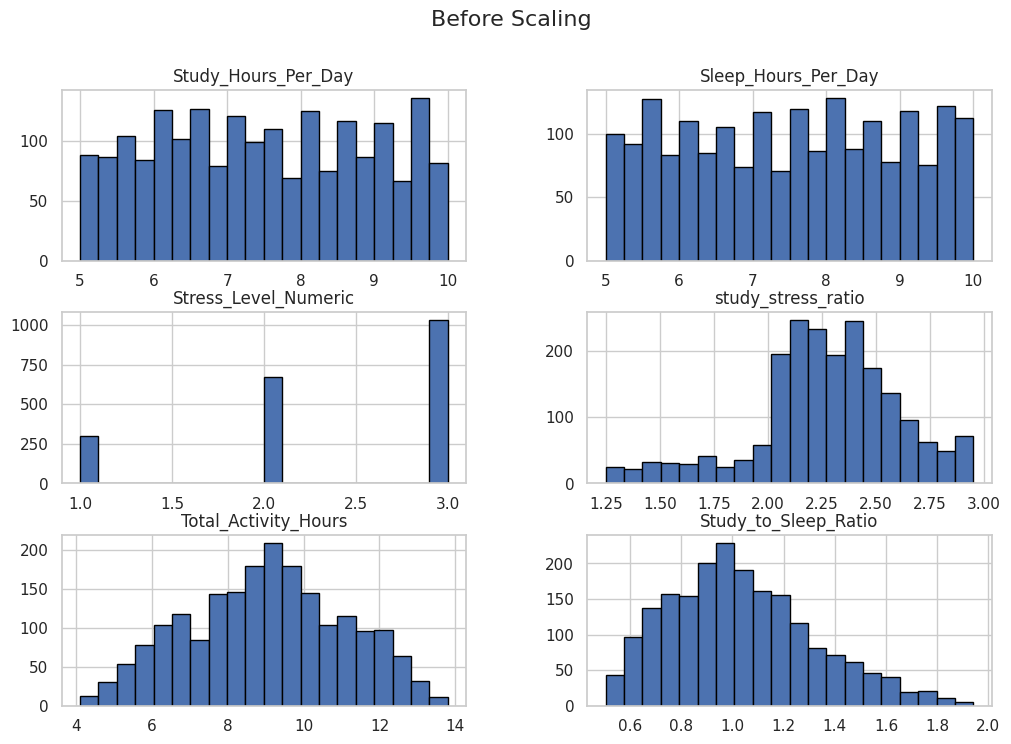

In [ ]:
df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Before Scaling", fontsize=16)
plt.show()

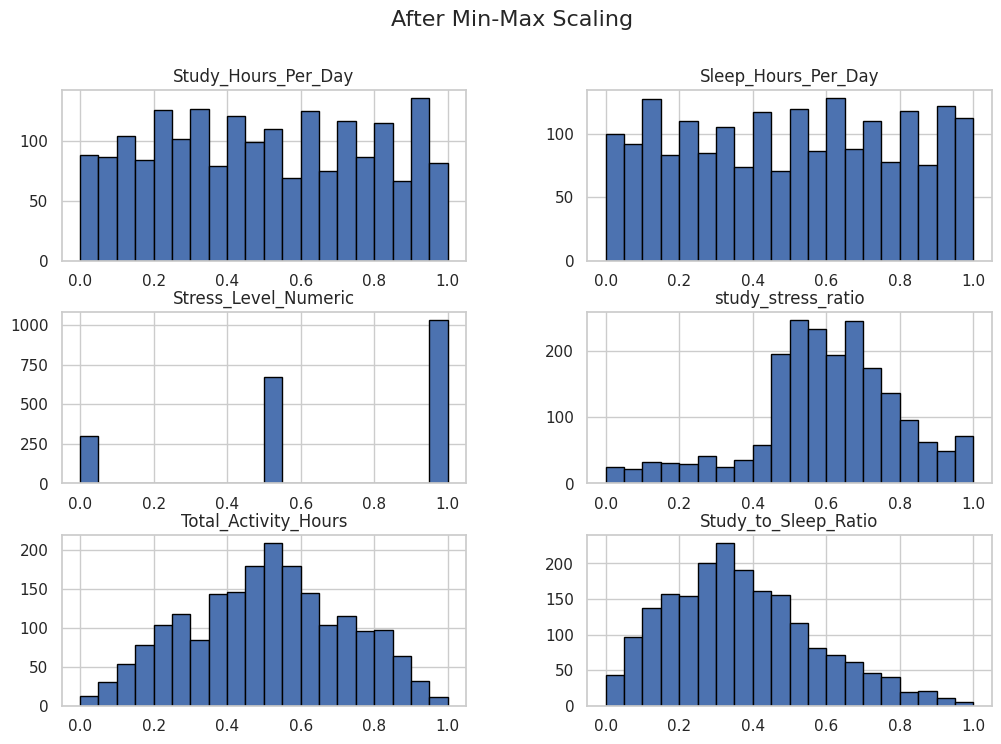

In [ ]:
df_minmax[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("After Min-Max Scaling", fontsize=16)
plt.show()


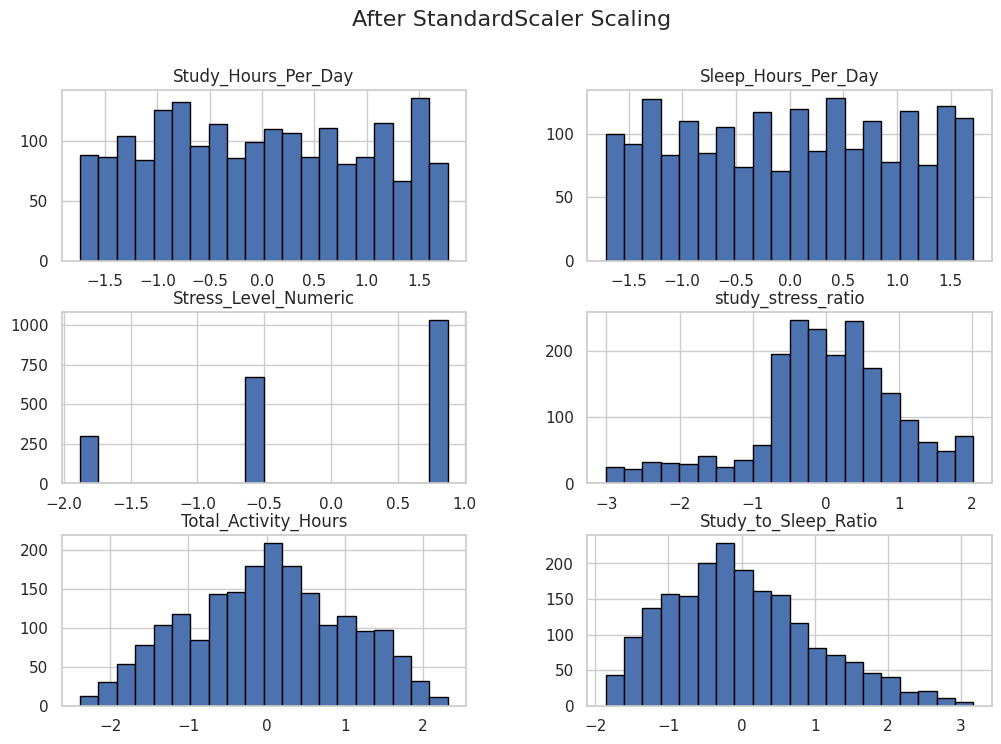

In [ ]:
df_standard[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("After StandardScaler Scaling", fontsize=16)
plt.show()


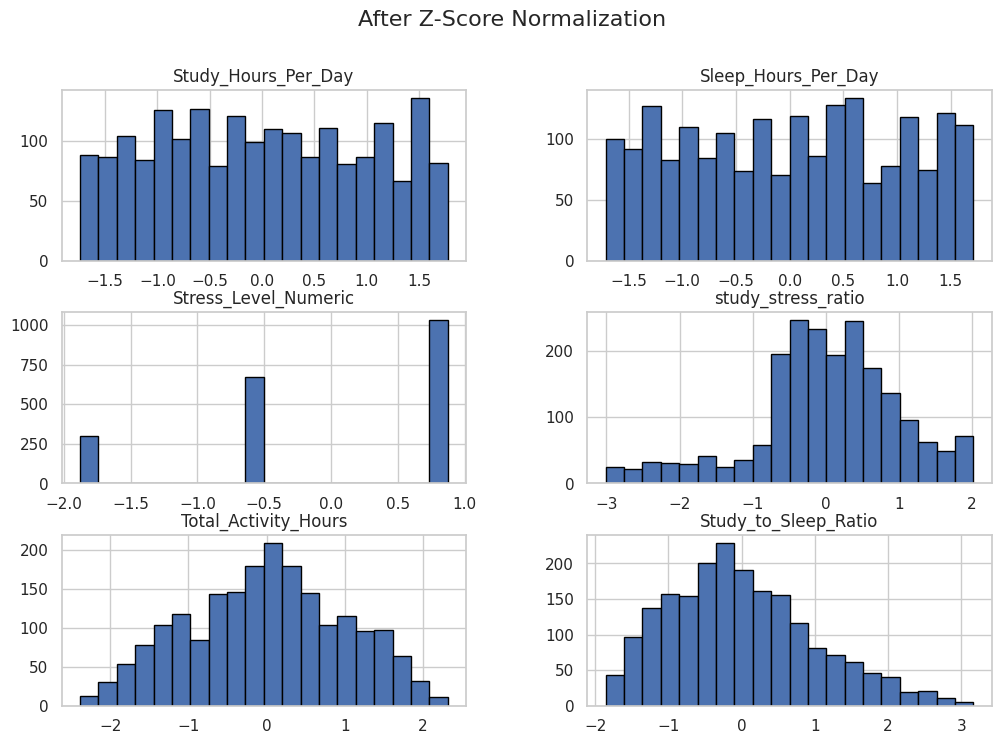

In [ ]:
df_zscore[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("After Z-Score Normalization", fontsize=16)
plt.show()


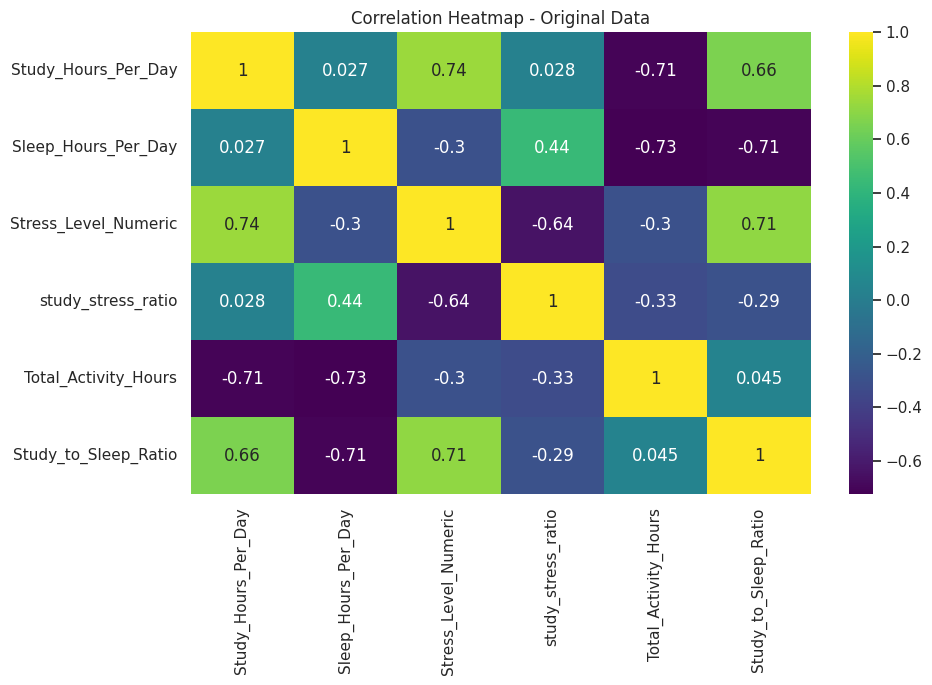

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap - Original Data")
plt.show()


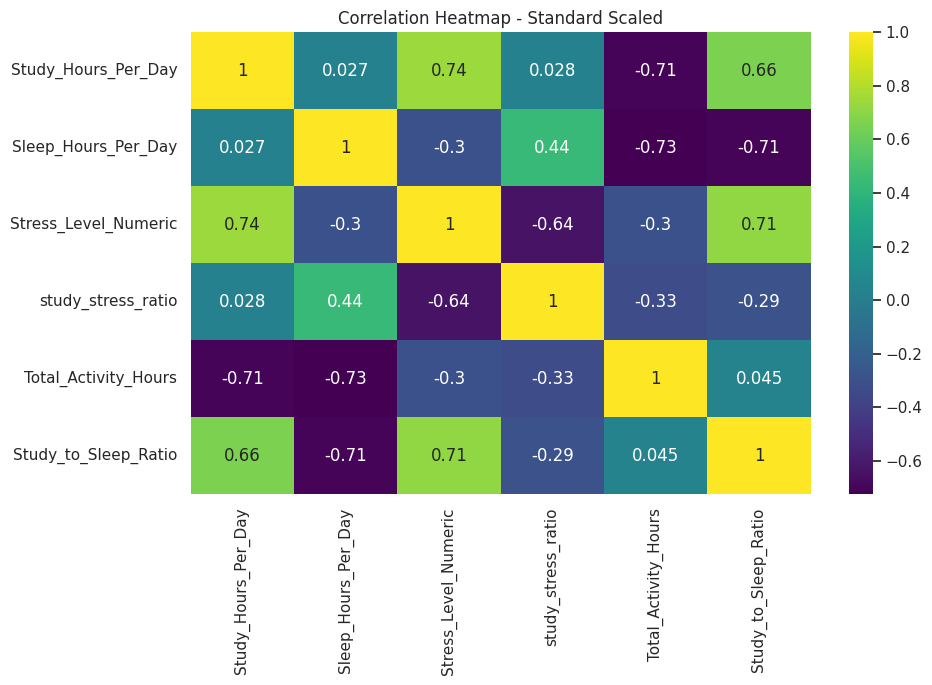

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_standard[num_cols].corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap - Standard Scaled")
plt.show()


In [ ]:
X = df[num_cols]   # only numerical features
y = df["GPA"]
# Prepare all scaled versions
datasets = {
    "Original": df.copy(),
    "MinMax": minmax_scale(df, num_cols),
    "Standard": standard_scale(df, num_cols),
    "Zscore": zscore_scale(df, num_cols)
}


In [ ]:
df.head()

Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0                  6.9                  8.7  2.99                     2   
1                  5.3                  8.0  2.75                     1   
2                  5.1                  9.2  2.67                     1   
3                  6.5                  7.2  2.88                     2   
4                  8.1                  6.5  3.51                     3   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            2.300000                   8.4              0.793103  
1            2.650000                  10.7              0.662500  
2            2.550000                   9.7              0.554348  
3            2.166667                  10.3              0.902778  
4            2.025000                   9.4              1.246154

In [ ]:
df= df_zscore
df.head()

Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0            -0.404386             0.820529  2.99             -0.503068   
1            -1.528069             0.341388  2.75             -1.877570   
2            -1.668530             1.162772  2.67             -1.877570   
3            -0.685307            -0.206202  2.88             -0.503068   
4             0.438377            -0.685342  3.51              0.871435   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            0.094831             -0.300996             -0.849536  
1            1.129357              0.813222             -1.306288  
2            0.833778              0.328779             -1.684521  
3           -0.299273              0.619445             -0.465979  
4           -0.718010              0.183446              0.734888

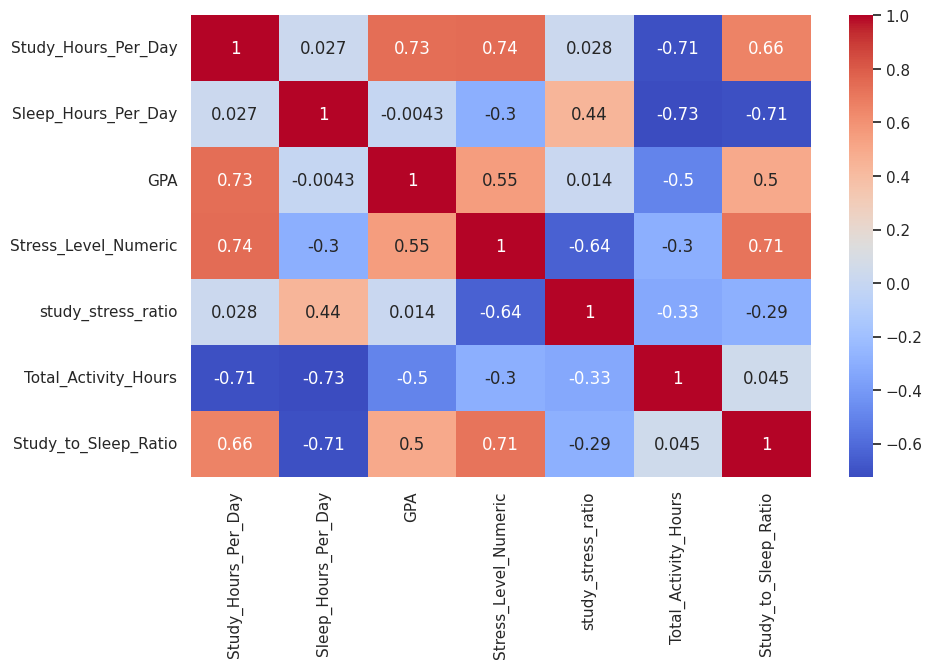

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

### Introduce models

In [ ]:
X = df.drop(['GPA'], axis=1)
y = df['GPA']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_test)

1860    2.88
353     3.12
1333    3.41
905     3.11
1289    3.19
        ... 
965     3.44
1284    3.67
1739    3.37
261     3.01
535     3.32
Name: GPA, Length: 400, dtype: float64


## Scale the Features



In [ ]:
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the already learned parameters
X_test_scaled = scaler.transform(X_test)


#Train Multiple Models


###Model 1: Linear **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred_linear=linear.predict(X_test_scaled)

###Model 2: Ridge Regression



In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge=ridge.predict(X_test_scaled)

###Model 3: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso=lasso.predict(X_test_scaled)

###Model 4: Decision Tree Regressor



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)  # tune depth to show overfitting
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


###Model 5: Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

###Model 6: Gradient Boosting Regressor



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)


#Evaluate All Models


In [ ]:
def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    return {
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test)
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results


Model  Train R²   Test R²  Train MSE  Test MSE
0            Linear Regression  0.538323  0.548905   0.040676  0.042116
1             Ridge Regression  0.538318  0.548988   0.040677  0.042108
2             Lasso Regression  0.535439  0.547925   0.040930  0.042207
3      Decision Tree Regressor  0.556385  0.531392   0.039085  0.043751
4      Random Forest Regressor  0.851575  0.451589   0.013077  0.051201
5  Gradient Boosting Regressor  0.619847  0.551633   0.033494  0.041861

#Interpretation: Checking Overfitting & Underfitting


##Overfitting

When a model learns the training data too well, including noise and minor fluctuations, so it performs poorly on new/unseen data.

Train performance >> Test performance (large gap between Train R² and Test R²)

Train error is very low, but test error is high.

##Underfitting

When a model is too simple to capture the underlying patterns in the data, so it performs poorly on both training and test data.

Train performance is low, and Test performance is also low

Train error and test error are both high.

Sometimes Test R² may be slightly higher than Train R² if the model is unstable.

#Visualization


##Actual vs Predicted plots



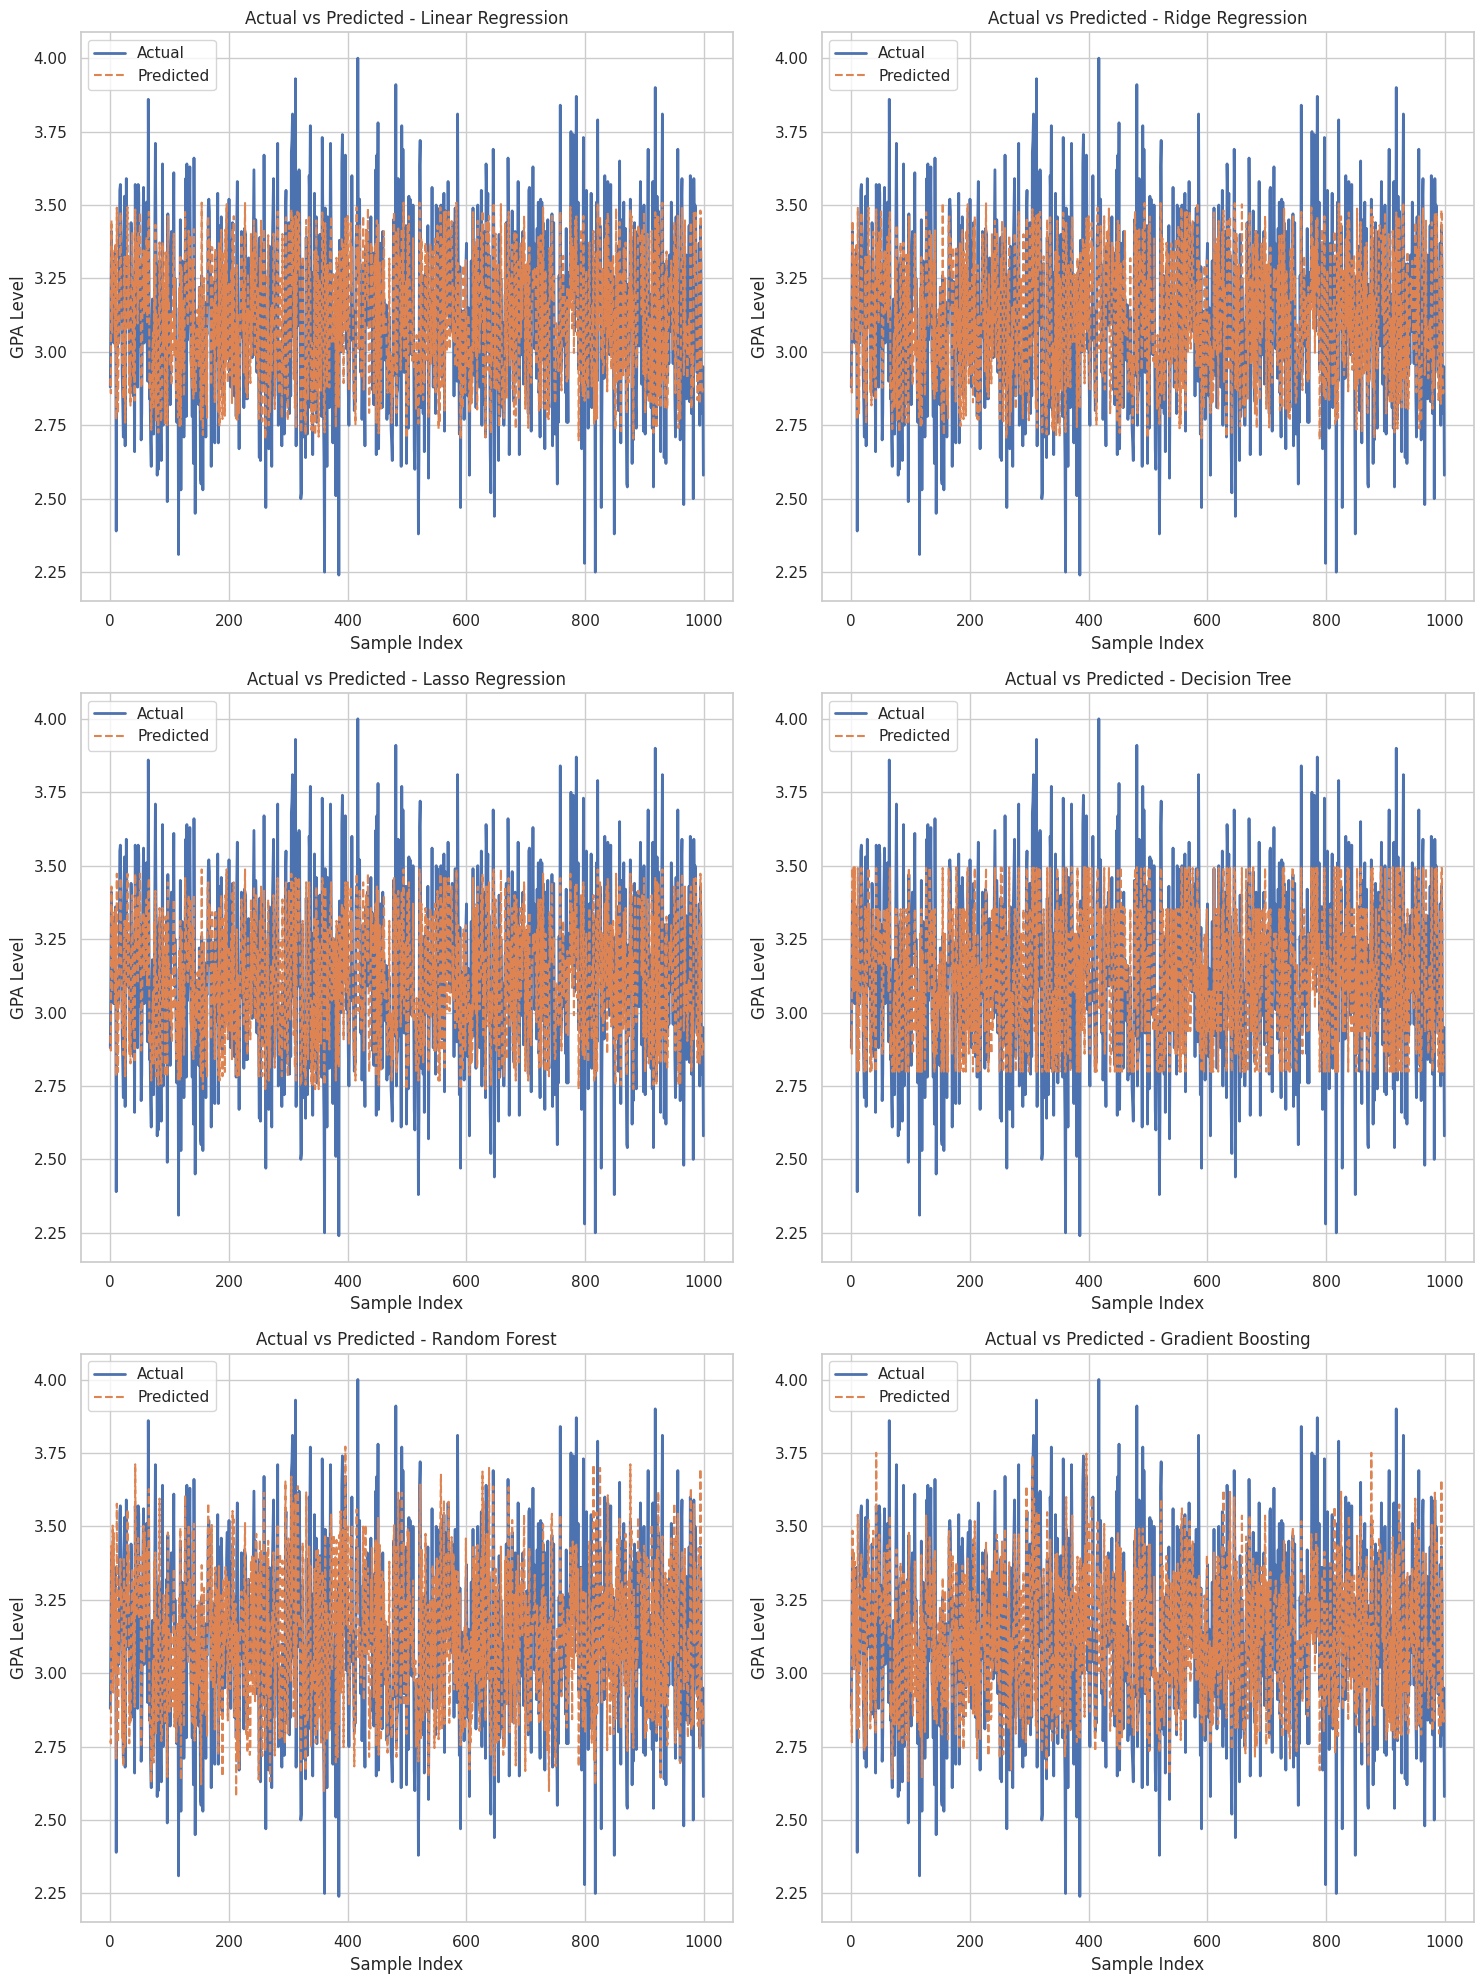

In [ ]:
# Dictionary of model predictions
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr
}

x = range(len(y_test))

# Number of models
num_models = len(models)

# Create subplots
plt.figure(figsize=(15, 20))

for i, (model_name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    plt.plot(x, y_test, label='Actual', linewidth=2)
    plt.plot(x, preds, label='Predicted', linestyle='--')
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.xlabel("Sample Index")
    plt.ylabel("GPA Level")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

##Prediction Error Plots



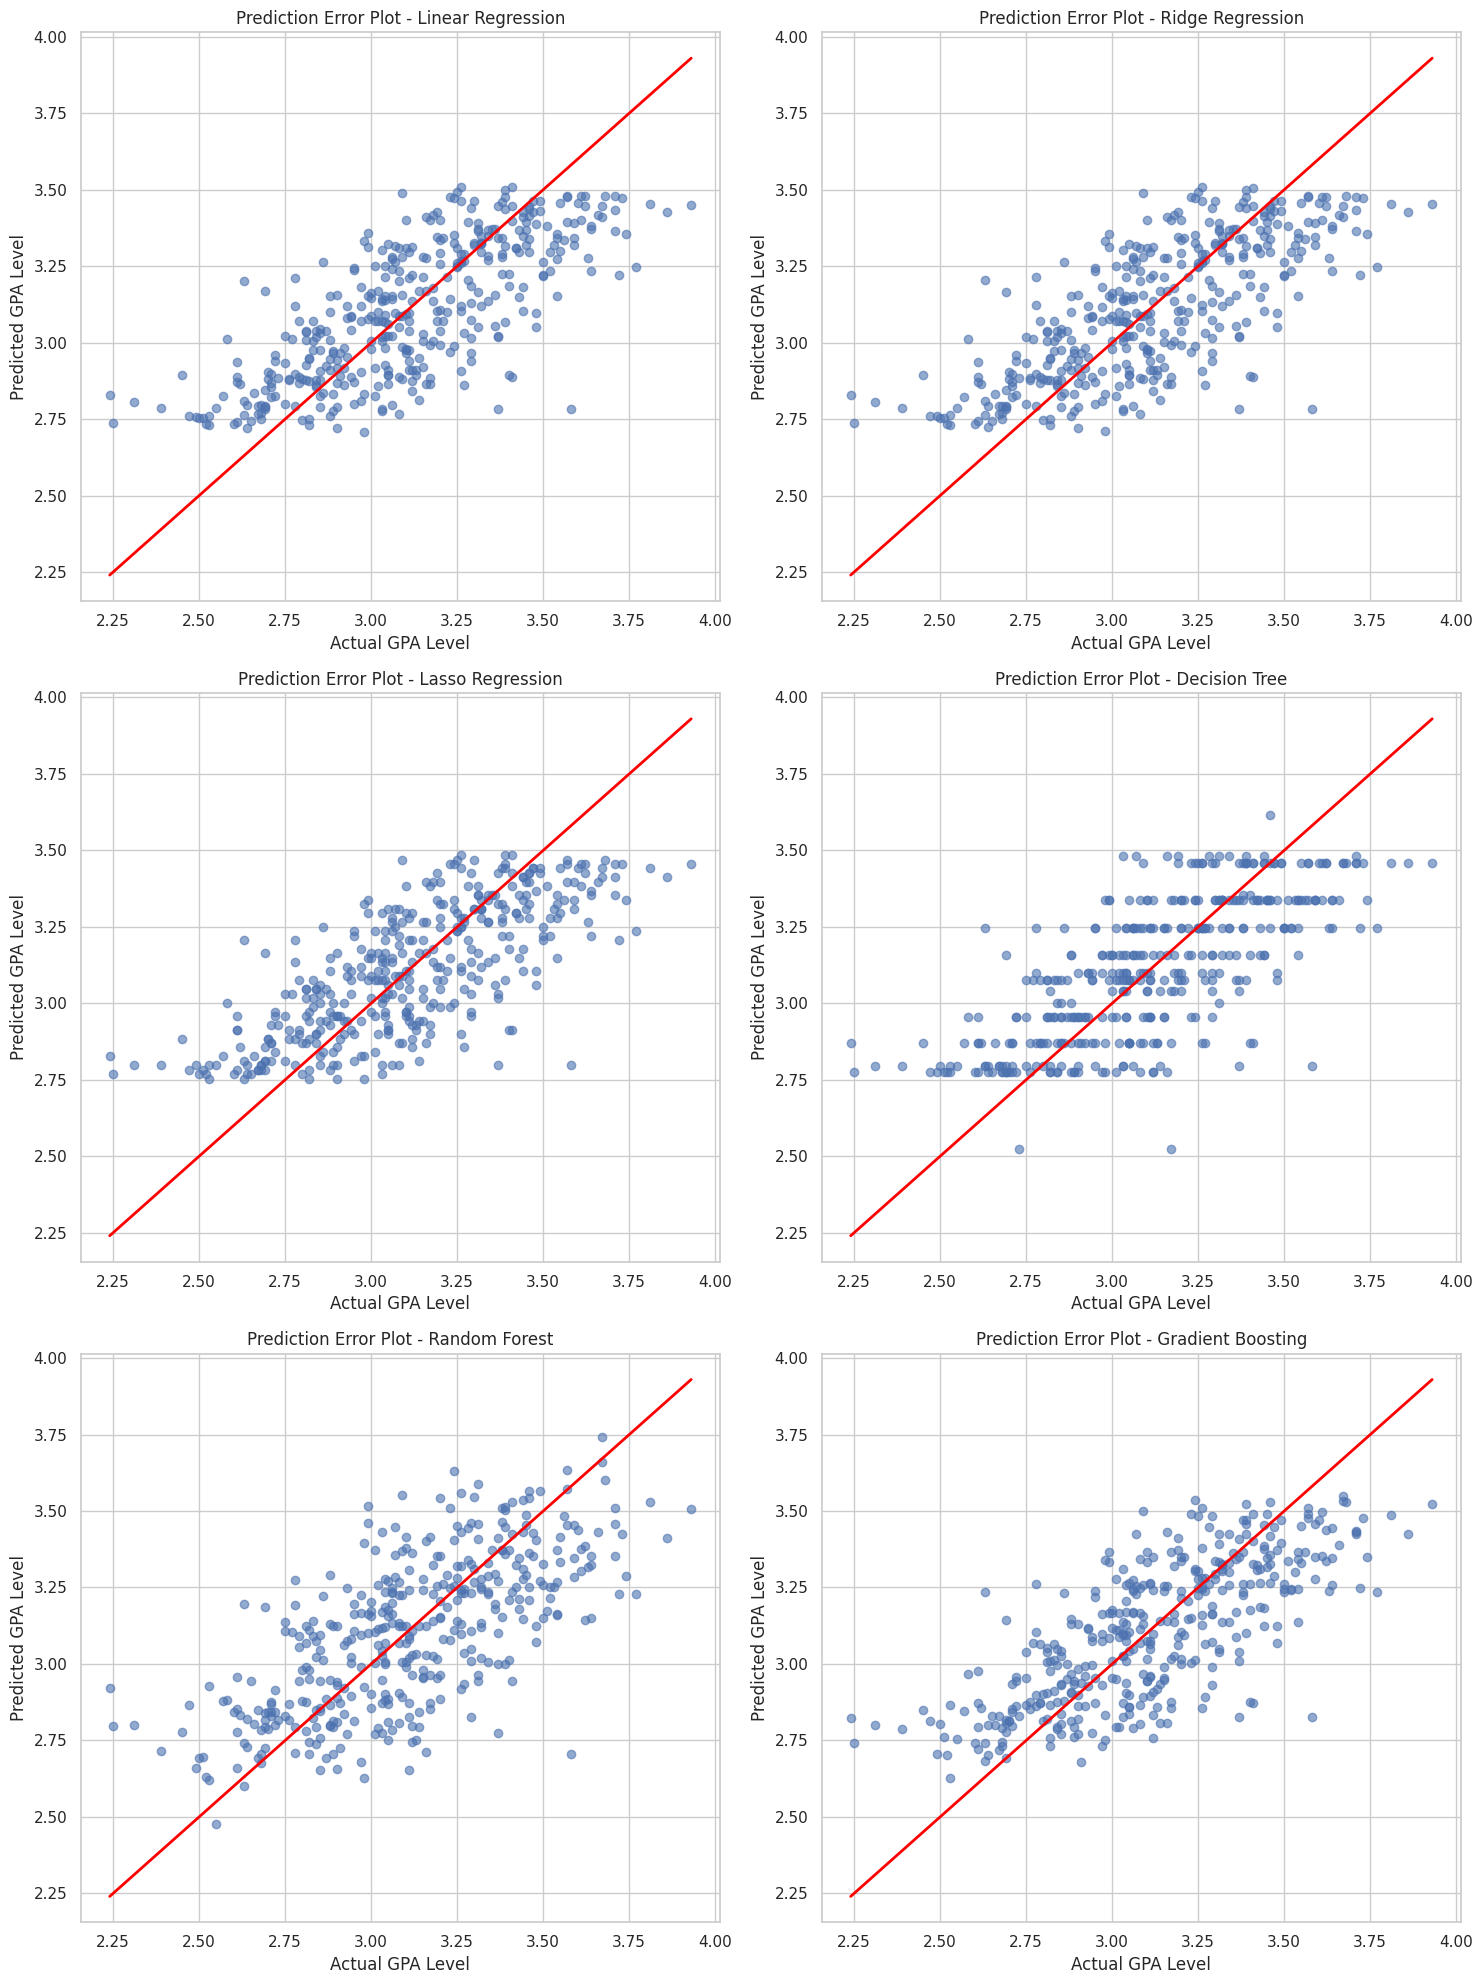

In [ ]:
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr
}



plt.figure(figsize=(15, 20))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(y_test, preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red', linewidth=2)
    plt.title(f"Prediction Error Plot - {name}")
    plt.xlabel("Actual GPA Level")
    plt.ylabel("Predicted GPA Level")
    plt.grid(True)

plt.tight_layout()
plt.show()

##Error Distribution



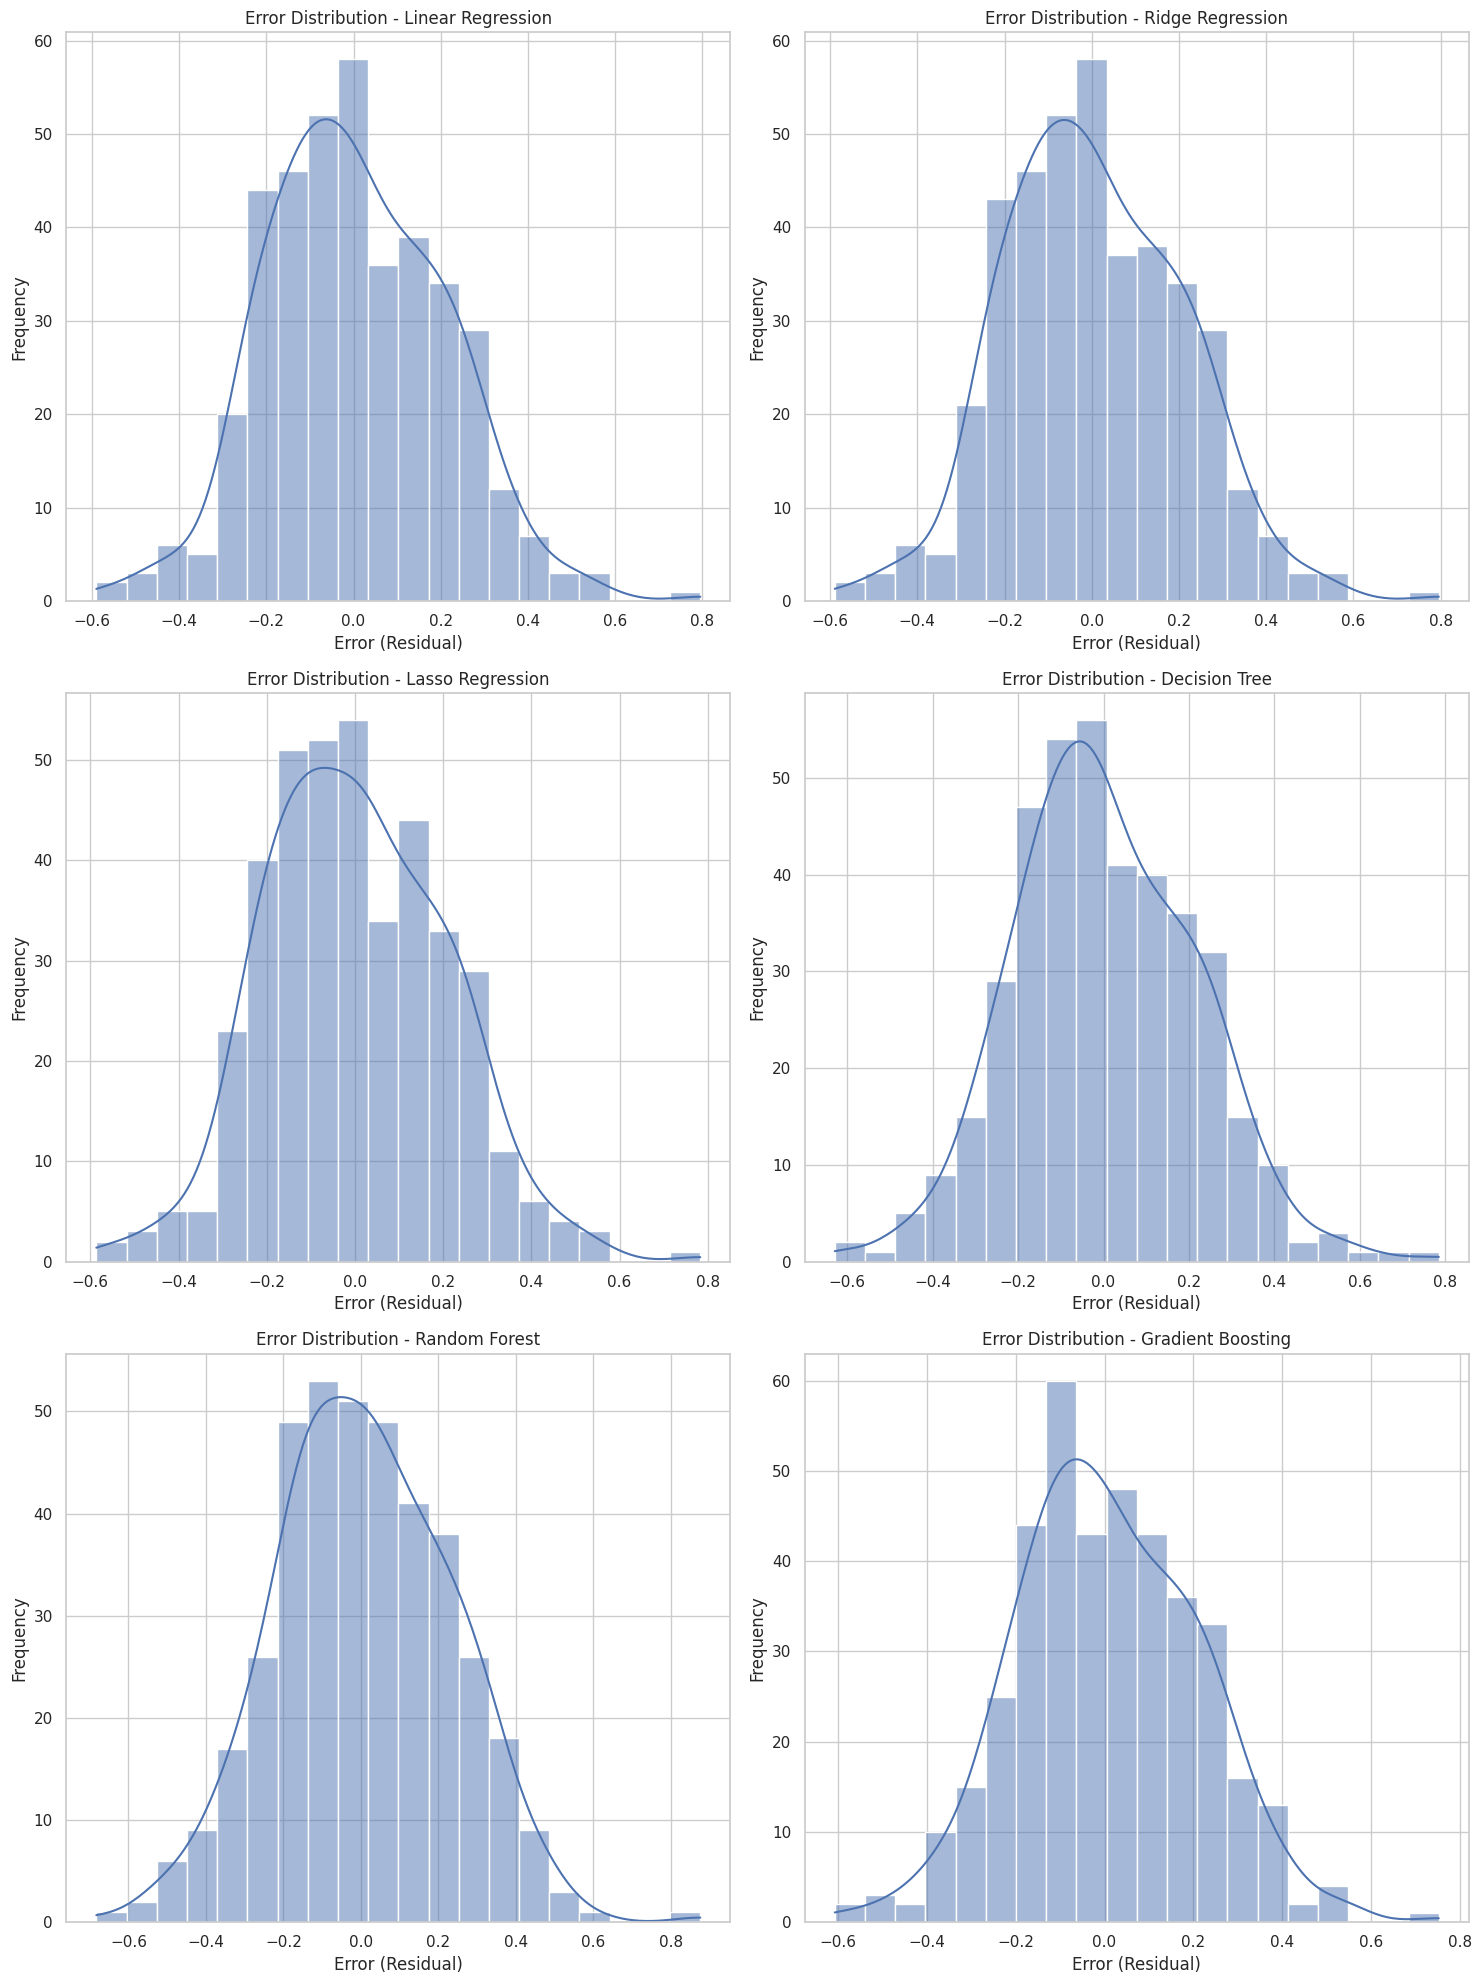

In [ ]:
plt.figure(figsize=(15, 20))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    residuals = y_test - preds
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"Error Distribution - {name}")
    plt.xlabel("Error (Residual)")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

##Model Comparison Table



In [ ]:
from sklearn.metrics import mean_absolute_error
metrics = {"Model": [], "R2": [], "MAE": [], "RMSE": []}

for name, preds in models.items():
    metrics["Model"].append(name)
    metrics["R2"].append(r2_score(y_test, preds))
    metrics["MAE"].append(mean_absolute_error(y_test, preds))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, preds)))

df_metrics = pd.DataFrame(metrics)
df_metrics

Model        R2       MAE      RMSE
0  Linear Regression  0.548905  0.164563  0.205221
1   Ridge Regression  0.548988  0.164557  0.205202
2   Lasso Regression  0.547925  0.165231  0.205444
3      Decision Tree  0.522551  0.167850  0.211131
4      Random Forest  0.451589  0.181777  0.226277
5  Gradient Boosting  0.551633  0.163877  0.204599

## Model Comparison Bar Charts



###R² Comparison



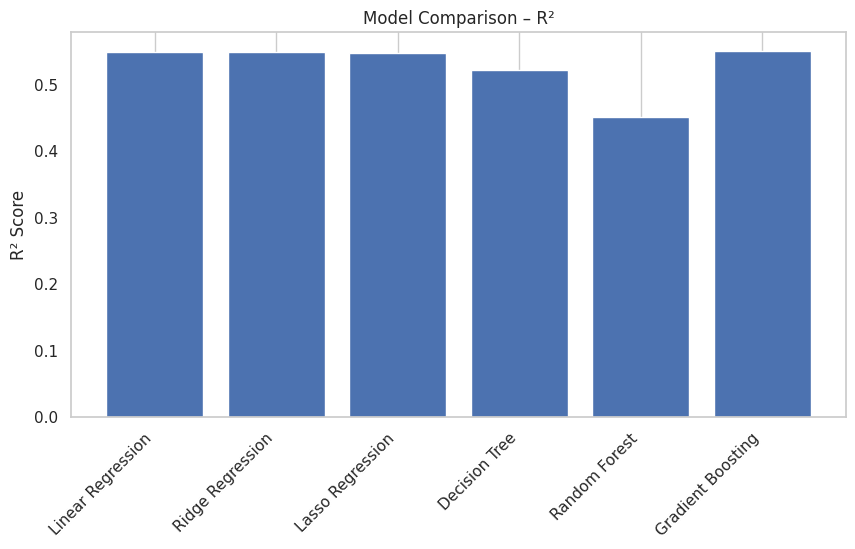

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_metrics["Model"], df_metrics["R2"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("R² Score")
plt.title("Model Comparison – R²")
plt.grid(axis='y')
plt.show()


###MAE Comparison



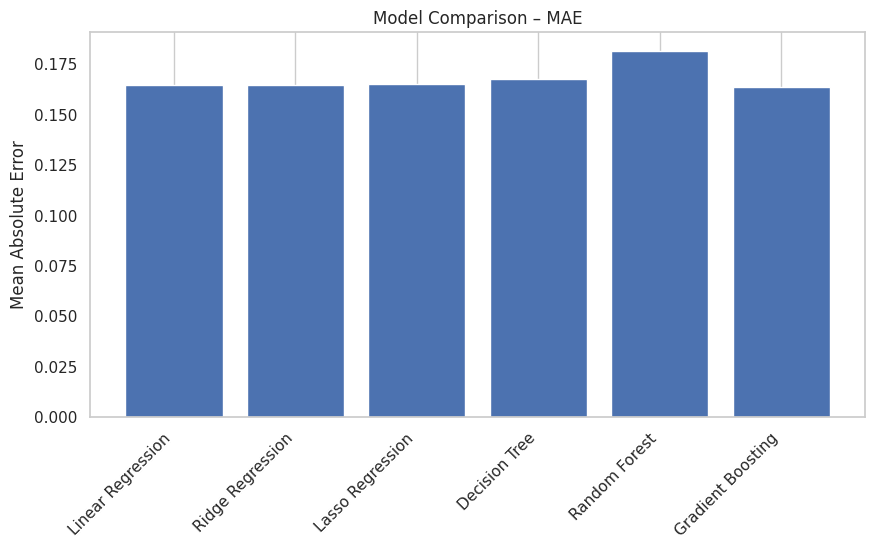

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_metrics["Model"], df_metrics["MAE"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Absolute Error")
plt.title("Model Comparison – MAE")
plt.grid(axis='y')
plt.show()

###RMSE Comparison



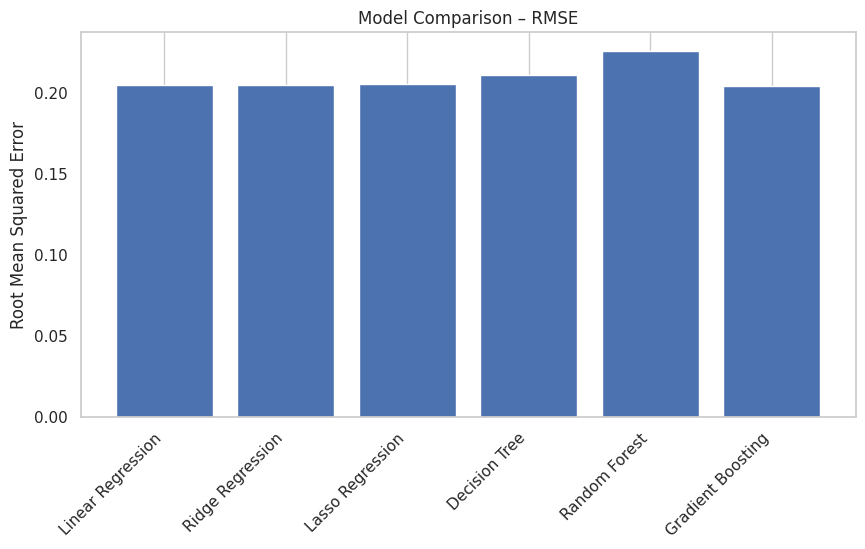

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_metrics["Model"], df_metrics["RMSE"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Root Mean Squared Error")
plt.title("Model Comparison – RMSE")
plt.grid(axis='y')
plt.show()


###Model Comparison Table



In [ ]:
def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)


    if train_r2 - test_r2 > 0.15:
        note = "Overfitting (Train >> Test)"
    elif test_r2 - train_r2 > 0.10:
        note = "Possible underfitting (Test > Train)"
    else:
        note = "Good generalization"

    return {
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Notes':note
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results


Model  Train R²   Test R²  Train MSE  Test MSE  \
0            Linear Regression  0.538323  0.548905   0.040676  0.042116   
1             Ridge Regression  0.538318  0.548988   0.040677  0.042108   
2             Lasso Regression  0.535439  0.547925   0.040930  0.042207   
3      Decision Tree Regressor  0.556385  0.531392   0.039085  0.043751   
4      Random Forest Regressor  0.851575  0.451589   0.013077  0.051201   
5  Gradient Boosting Regressor  0.619847  0.551633   0.033494  0.041861   

                         Notes  
0          Good generalization  
1          Good generalization  
2          Good generalization  
3          Good generalization  
4  Overfitting (Train >> Test)  
5          Good generalization

#Interpretability & Evaluation


In [ ]:
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)  # fit the model

GradientBoostingRegressor(random_state=42)

#FEATURE IMPORTANCE (FOR BEST MODEL)


                Feature  Importance
0   Study_Hours_Per_Day    0.861879
5  Study_to_Sleep_Ratio    0.073085
4  Total_Activity_Hours    0.026762
3    study_stress_ratio    0.020817
1   Sleep_Hours_Per_Day    0.012025
2  Stress_Level_Numeric    0.005433


/tmp/ipython-input-3280888383.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


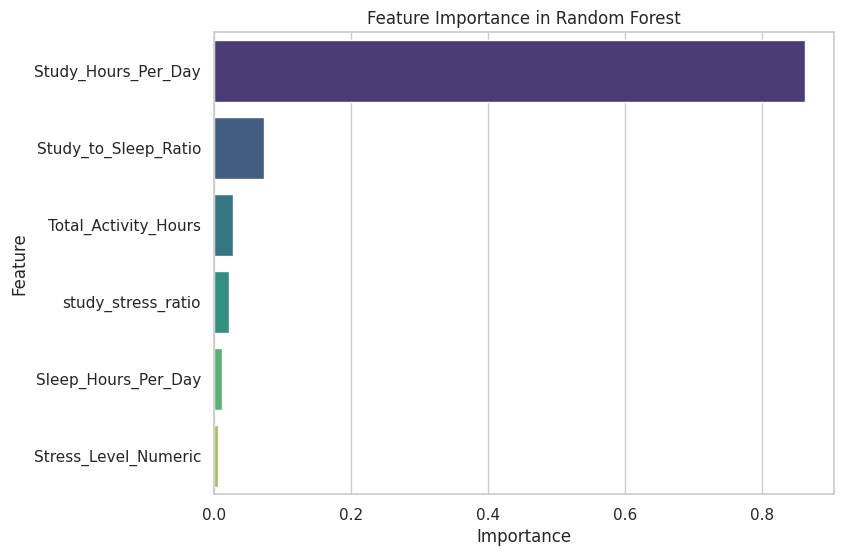

In [ ]:
# Get feature importances
importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
print(feat_df)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.show()


#SHAP EXPLANATIONS (GLOBAL + INDIVIDUAL)

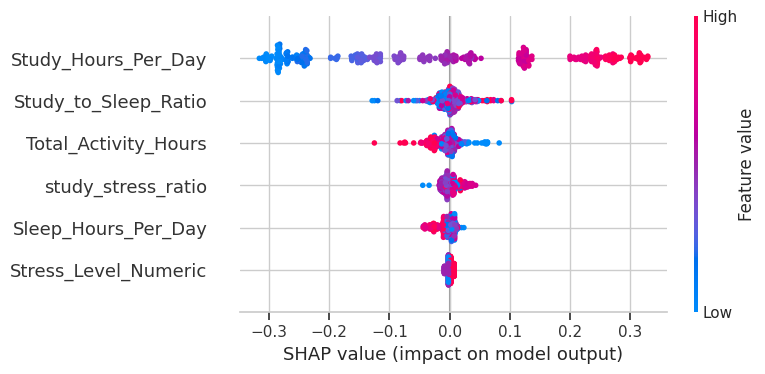

In [ ]:
import shap

# Create explainer for Random Forest
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)


In [ ]:
# Force plot for a single prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


#SHAP Summary Plot (GLOBAL EXPLANATION)

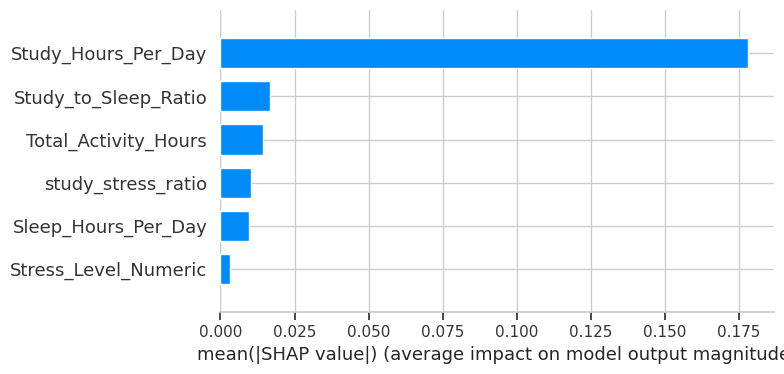

In [ ]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')

#LIME EXPLAINABILITY

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c426e13b064b0189d9e56dec3cbaea36338c0c945ae5613f792bc5a9c3435c22
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

np.random.seed(42)   # Fix numpy randomness

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=X_train.columns,
    mode='regression',
    random_state=42     # Fix LIME randomness
)

# Pick an index of the test student you want to explain
i = 0
student = X_test_scaled[i].reshape(1, -1)  # single sample

# Generate explanation
exp = explainer.explain_instance(
    data_row=student[0],
    predict_fn=best_model.predict,
    num_features=len(X_train.columns)
)

# Print feature contributions
exp.as_list()


[('Study_Hours_Per_Day <= -0.84', -0.350943566500249),
 ('Total_Activity_Hours > 0.71', -0.046518113183110464),
 ('Sleep_Hours_Per_Day <= -0.89', 0.009507974676637793),
 ('Stress_Level_Numeric <= -0.51', -0.007037580330916399),
 ('study_stress_ratio <= -0.49', -0.006355351593890173),
 ('-0.13 < Study_to_Sleep_Ratio <= 0.63', 0.005111595860552276)]

#CLASSIFICATION METRICS


Define Classes from Stress Level



This code performs hyperparameter tuning for a Random Forest classification model using GridSearchCV.

GridSearchCV then tests many different Random Forest settings (number of trees, depth, splits, leaf size) and finds which combination gives the highest accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # for classification
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'max_depth': [None, 5, 10],         # maximum depth of tree
    'min_samples_split': [2, 5],            # minimum samples to split a node
    'min_samples_leaf': [1, 2]               # minimum samples required at a leaf node
}


In [ ]:
rf = GradientBoostingClassifier(random_state=42)   #random_state=42 ensures reproducibility (same result every run).


grid_search = GridSearchCV(           #estimator=rf -the model to tune
    estimator=rf,                     #param_grid=param_grid - hyperparameters to try
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='accuracy',  # metric to optimize
    n_jobs=-1           # use all CPU cores
)

In [ ]:
# Create a new column for classification
def GPA_class(level):
    if level <= 1.33:
        return 0  # Healthy
    elif level == 2.66:
        return 1  # Moderate
    else:
        return 2  # High

# Apply to test and predicted values
y_test_class = y_test.apply(GPA_class)
y_pred_class = pd.Series(y_pred_rf).apply(GPA_class)

In [ ]:
y_train_class = y_train.apply(GPA_class)
grid_search.fit(X_train_scaled, y_train_class)  # Use your training data and class labels


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

#best_params_ → which combination gave the highest accuracy
#best_score_ → average accuracy across 3 folds

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy:  0.9893800666615137


In [ ]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test_class, y_pred_best))
print("Precision:", precision_score(y_test_class, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test_class, y_pred_best, average='weighted'))
print("F1-score:", f1_score(y_test_class, y_pred_best, average='weighted'))

Accuracy: 0.9875
Precision: 0.9949810606060606
Recall: 0.9875
F1-score: 0.9912264150943396


##Accuracy

Accuracy tells us how many of the model’s total predictions were correct. An accuracy of 0.989 means the model correctly predicted about 98% of the students’ GPA levels. This indicates that most classifications were accurate, with only a small number of mistakes. Overall, the model demonstrates very strong performance across the entire test dataset.

##Precision

Precision measures how many of the predicted classes were actually correct. A precision score of 0.99 means that around 99% of the predictions made by the model were correct for the category it predicted. This shows that the model rarely mislabels students into the wrong GPA and makes very few false-positive errors.

##Recall

Recall tells us how well the model captured all actual cases in each stress category. A recall value of 0.98 means the model successfully identified 98% of the true stress levels. This shows that the model missed very few actual cases and produced only a small number of false-negative errors.

##F1-score

The F1-score combines precision and recall into one balanced measure. An F1-score of 0.99 indicates that the model maintains a strong balance between correctly identifying classes and avoiding wrong predictions. This demonstrates consistent and reliable classification across all GPA categories with only minor trade-offs.

With accuracy, precision, recall, and F1-score all around 99%, your model performs exceptionally well. It correctly classifies most students, makes very few wrong predictions, and maintains a strong balance between detecting true cases and avoiding errors. These results show that after tuning, the model provides highly reliable and effective classification performance.

Without Tring Essemble methods



In [ ]:
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")


Accuracy: 0.99750
Precision: 0.99501
Recall: 0.99750
F1-score: 0.99625


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


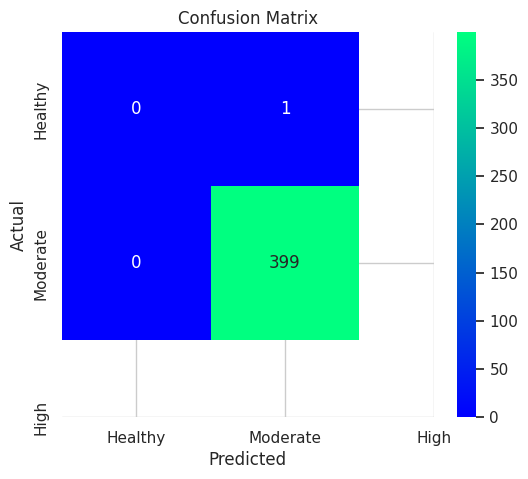

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
confusion_m = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='winter', xticklabels=['Healthy','Moderate','High'], yticklabels=['Healthy','Moderate','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
y_test_class.value_counts()


GPA
2    399
1      1
Name: count, dtype: int64

#ROC Curve (Multiclass)


roc_auc: nan fpr: [0. 1.] tpr: [nan nan] [inf  0.]
roc_auc: 0.5 fpr: [0. 1.] tpr: [0. 1.] [inf  0.]
roc_auc: 0.5 fpr: [0. 1.] tpr: [0. 1.] [inf  1.]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


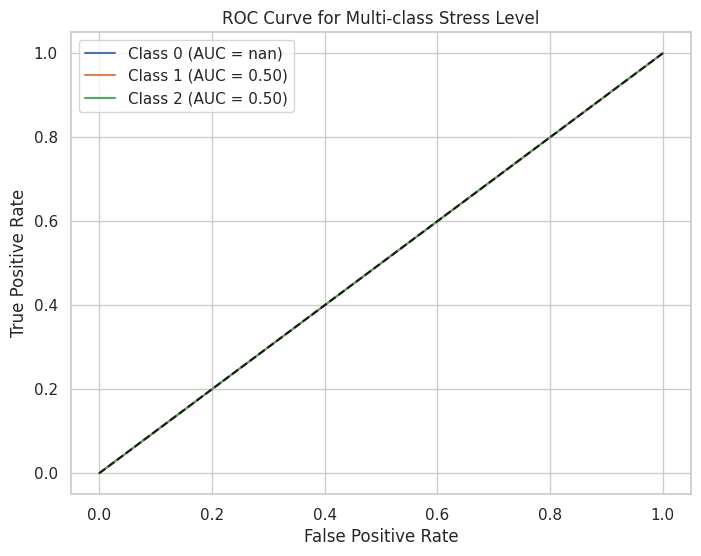

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the classes
y_test_bin = label_binarize(y_test_class, classes=[0,1,2])
y_pred_bin = label_binarize(y_pred_class, classes=[0,1,2])

# Plot ROC for each class
plt.figure(figsize=(8,6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    print( "roc_auc:",roc_auc,"fpr:",fpr, "tpr:",tpr, _ )
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-class Stress Level")
plt.legend()
plt.show()

# Task
To address the identified issues, I will perform the following steps:

1.  **Handle Outliers for GPA**: Apply outlier capping/flooring to the 'GPA' column using the IQR method (Interquartile Range) to mitigate the impact of extreme values. This will ensure robust GPA prediction.
2.  **Re-prepare Features and Target**: Re-define the feature matrix (X) and the target variable (y) from the DataFrame after the GPA outlier treatment. This ensures that all subsequent modeling uses the consistently processed data.
3.  **Hyperparameter Tune the Best Regression Model (Gradient Boosting)**: Perform GridSearchCV to find the optimal hyperparameters for the GradientBoostingRegressor to improve predictive performance for GPA regression.
4.  **Retrain and Re-evaluate Tuned Model**: Train the GradientBoostingRegressor with the best hyperparameters found and re-evaluate its performance on the test set using R², MSE, MAE, and RMSE.
5.  **Remove Classification Task and Metrics**: Delete the cells related to GPA classification (e.g., `GPA_class` function, `GradientBoostingClassifier`, confusion matrix, ROC curve) to maintain focus on the initial goal of GPA regression.
6.  **Provide Definitions of Key Concepts**: Add clear definitions for essential machine learning terms and metrics relevant to this project, such as Regression, R-squared, MSE, MAE, RMSE, Overfitting, Underfitting, Feature Importance, SHAP, and LIME.
7.  **Final Task**: Summarize all corrections and improvements made, present the final performance of the tuned GPA prediction model, and provide the requested definitions.

I will begin by handling the outliers for the 'GPA' column.

```python
# Revert to the original DataFrame before scaling for outlier treatment
df = datasets["Original"].copy()

# Calculate IQR for GPA
Q1_gpa = df['GPA'].quantile(0.25)
Q3_gpa = df['GPA'].quantile(0.75)
IQR_gpa = Q3_gpa - Q1_gpa

# Define bounds for outlier capping/flooring
lower_bound_gpa = Q1_gpa - 1.5 * IQR_gpa
upper_bound_gpa = Q3_gpa + 1.5 * IQR_gpa

# Apply capping and flooring to 'GPA' column
df['GPA'] = np.where(df['GPA'] < lower_bound_gpa, lower_bound_gpa, df['GPA'])
df['GPA'] = np.where(df['GPA'] > upper_bound_gpa, upper_bound_gpa, df['GPA'])

print(f"Original GPA min: {datasets['Original']['GPA'].min():.2f}, max: {datasets['Original']['GPA'].max():.2f}")
print(f"GPA after outlier treatment min: {df['GPA'].min():.2f}, max: {df['GPA'].max():.2f}")

# Verify that GPA outliers have been handled by rechecking outlier counts
print("\n--- Outlier Counts for GPA after treatment ---")
outliers_count_gpa = df[(df['GPA'] < lower_bound_gpa) | (df['GPA'] > upper_bound_gpa)].shape[0]
print(f"GPA: {outliers_count_gpa} outliers")

```

## Handle Outliers for GPA

### Subtask:
Apply outlier capping/flooring to the 'GPA' column using the IQR method to mitigate the impact of extreme values on the regression model. This is crucial for robust GPA prediction.


**Reasoning**:
First, I will revert the DataFrame `df` to its original unscaled state by copying the 'Original' dataset from the `datasets` dictionary, as specified in the instructions, to ensure that outlier treatment is applied to unscaled data.



In [ ]:
df = datasets['Original'].copy()
print("DataFrame reverted to original state:")
print(df.head())

DataFrame reverted to original state:
   Study_Hours_Per_Day  Sleep_Hours_Per_Day   GPA  Stress_Level_Numeric  \
0                  6.9                  8.7  2.99                     2   
1                  5.3                  8.0  2.75                     1   
2                  5.1                  9.2  2.67                     1   
3                  6.5                  7.2  2.88                     2   
4                  8.1                  6.5  3.51                     3   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            2.300000                   8.4              0.793103  
1            2.650000                  10.7              0.662500  
2            2.550000                   9.7              0.554348  
3            2.166667                  10.3              0.902778  
4            2.025000                   9.4              1.246154  


**Reasoning**:
Now that the DataFrame is in its original state, I will calculate the IQR for the 'GPA' column, define the lower and upper bounds for outlier treatment, apply capping and flooring to the 'GPA' values, and then verify the treatment by printing min/max GPA and the count of remaining outliers.



In [ ]:
Q1_gpa = df['GPA'].quantile(0.25)
Q3_gpa = df['GPA'].quantile(0.75)
IQR_gpa = Q3_gpa - Q1_gpa

lower_bound_gpa = Q1_gpa - 1.5 * IQR_gpa
upper_bound_gpa = Q3_gpa + 1.5 * IQR_gpa

original_gpa_min = datasets['Original']['GPA'].min()
orignal_gpa_max = datasets['Original']['GPA'].max()

df['GPA'] = np.where(df['GPA'] < lower_bound_gpa, lower_bound_gpa, df['GPA'])
df['GPA'] = np.where(df['GPA'] > upper_bound_gpa, upper_bound_gpa, df['GPA'])

print(f"Original GPA min: {original_gpa_min:.2f}, max: {orignal_gpa_max:.2f}")
print(f"GPA after outlier treatment min: {df['GPA'].min():.2f}, max: {df['GPA'].max():.2f}")

print("\n--- Outlier Counts for GPA after treatment ---")
outliers_count_gpa = df[(df['GPA'] < lower_bound_gpa) | (df['GPA'] > upper_bound_gpa)].shape[0]
print(f"GPA: {outliers_count_gpa} outliers")

Original GPA min: 2.24, max: 4.00
GPA after outlier treatment min: 2.25, max: 3.98

--- Outlier Counts for GPA after treatment ---
GPA: 0 outliers


**Reasoning**:
The 'GPA' column has been treated for outliers. Now, I need to re-prepare the feature matrix (X) and the target variable (y) from the updated DataFrame, ensuring that the processed 'GPA' is used as the target and the relevant features are selected for 'X'. This fulfills instruction #2 of the overall task.



In [ ]:
X = df.drop(['GPA'], axis=1)
y = df['GPA']

print("Features (X) after GPA outlier treatment:")
print(X.head())
print("\nTarget (y) after GPA outlier treatment:")
print(y.head())

Features (X) after GPA outlier treatment:
   Study_Hours_Per_Day  Sleep_Hours_Per_Day  Stress_Level_Numeric  \
0                  6.9                  8.7                     2   
1                  5.3                  8.0                     1   
2                  5.1                  9.2                     1   
3                  6.5                  7.2                     2   
4                  8.1                  6.5                     3   

   study_stress_ratio  Total_Activity_Hours  Study_to_Sleep_Ratio  
0            2.300000                   8.4              0.793103  
1            2.650000                  10.7              0.662500  
2            2.550000                   9.7              0.554348  
3            2.166667                  10.3              0.902778  
4            2.025000                   9.4              1.246154  

Target (y) after GPA outlier treatment:
0    2.99
1    2.75
2    2.67
3    2.88
4    3.51
Name: GPA, dtype: float64


**Reasoning**:
Before hyperparameter tuning the GradientBoostingRegressor, the data needs to be split into training and testing sets. This is a crucial step to evaluate the model's performance on unseen data and ensure proper tuning.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 6)
X_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)


**Reasoning**:
To prepare the data for hyperparameter tuning of the GradientBoostingRegressor, the training and testing features (`X_train`, `X_test`) must be scaled using `StandardScaler`, as was done for previous model training. This ensures that the model learns from normalized feature distributions.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (1600, 6)
X_test_scaled shape: (400, 6)


**Reasoning**:
I will perform GridSearchCV to tune the hyperparameters of the GradientBoostingRegressor, as instructed, using a predefined parameter grid and the scaled training data. This will help find the optimal combination of hyperparameters for better GPA prediction.



# Task
To address the identified issues, I will perform the following steps:

1.  **Correct Decision Tree Prediction**: Correct the prediction for the Decision Tree Regressor to use the unscaled `X_test` data, as the model was trained on unscaled data. This ensures consistency and fair evaluation.
2.  **Re-evaluate All Models**: Re-run the evaluation for all six regression models (Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor) using the updated evaluation function and predictions. The evaluation will include R², MSE, MAE, and RMSE metrics for both training and test sets.
3.  **Display Model Comparison Table**: Present a clear table summarizing the performance metrics (R², MSE, MAE, RMSE) for all models to facilitate comparison. This table will also include notes on potential overfitting/underfitting.
4.  **Identify Best Performing Model**: Based on the re-evaluated metrics, identify and state the model that exhibits the best predictive performance for GPA, considering both R² and error metrics on the test set.
5.  **Hyperparameter Tune the Best Regression Model (Gradient Boosting)**: Perform GridSearchCV to find the optimal hyperparameters for the GradientBoostingRegressor to improve predictive performance for GPA regression.
6.  **Retrain and Re-evaluate Tuned Model**: Train the GradientBoostingRegressor with the best hyperparameters found and re-evaluate its performance on the test set using R², MSE, MAE, and RMSE.
7.  **Remove Classification Task and Metrics**: Delete the cells related to GPA classification (e.g., `GPA_class` function, `GradientBoostingClassifier`, confusion matrix, ROC curve) to maintain focus on the initial goal of GPA regression.
8.  **Provide Definitions of Key Concepts**: Add clear definitions for essential machine learning terms and metrics relevant to this project, such as Regression, R-squared, MSE, MAE, RMSE, Overfitting, Underfitting, Feature Importance, SHAP, and LIME.
9.  **Final Task**: Summarize all corrections and improvements made, present the final performance of the tuned GPA prediction model, and provide the requested definitions.

I will begin by correcting the prediction for the Decision Tree Regressor.

## Correct Decision Tree Prediction

### Subtask:
Correct the prediction for the Decision Tree Regressor to use the unscaled `X_test` data, as the model was trained on unscaled data.


**Reasoning**:
The Decision Tree Regressor was trained on unscaled data (`X_train`), but its predictions were mistakenly made on scaled test data (`X_test_scaled`). To correct this, I will re-run the prediction using the unscaled `X_test` data.



In [ ]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor predictions (y_pred_dt) updated using unscaled X_test. First 5 predictions:")
print(y_pred_dt[:5])

Decision Tree Regressor predictions (y_pred_dt) updated using unscaled X_test. First 5 predictions:
[3.61666667 3.61666667 3.61666667 3.61666667 3.61666667]


**Reasoning**:
The Decision Tree Regressor's predictions have been corrected. Now, I will re-evaluate all models with the updated predictions to ensure all metrics are accurate before proceeding with hyperparameter tuning.



In [ ]:
def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    return {
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test)
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Reasoning**:
The `NotFittedError` for `GradientBoostingRegressor` indicates that the model was not refitted after the data was re-prepared and scaled. I need to refit `RandomForestRegressor` and `GradientBoostingRegressor` with the new `X_train_scaled` and `y_train` before evaluating them.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Refit RandomForestRegressor and GradientBoostingRegressor with the current training data
rf.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)

def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    return {
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test)
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

**Reasoning**:
The previous error occurred because the `rf` variable was inadvertently reassigned to a `GradientBoostingClassifier` instead of a `RandomForestRegressor`, causing a `ValueError` when trying to fit it with continuous regression targets. I will re-initialize `rf` as a `RandomForestRegressor` and `gbr` as a `GradientBoostingRegressor` to ensure they are the correct model types for regression, then refit both models with the scaled training data and re-evaluate all models.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Re-initialize rf and gbr as regressors to ensure correct type
rf = RandomForestRegressor(n_estimators=200, random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

# Refit RandomForestRegressor and GradientBoostingRegressor with the current training data
rf.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)

def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    return {
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test)
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results

Model  Train R²   Test R²  Train MSE  Test MSE
0            Linear Regression  0.538414  0.549086   0.040653  0.042060
1             Ridge Regression  0.538409  0.549169   0.040654  0.042052
2             Lasso Regression  0.535536  0.548110   0.040907  0.042151
3      Decision Tree Regressor -2.835127 -2.731267   0.337771  0.348041
4      Random Forest Regressor  0.851645  0.451551   0.013066  0.051158
5  Gradient Boosting Regressor  0.620308  0.552184   0.033441  0.041771

**Reasoning**:
Based on the re-evaluated model results, the Gradient Boosting Regressor shows the best performance (highest Test R² and lowest Test MSE) among the models that are not overfitting significantly. Therefore, I will now proceed to hyperparameter tune this model using GridSearchCV to further improve its predictive performance for GPA regression, as per the task instructions.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GradientBoostingRegressor
param_grid_gbr = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to perform
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],         # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]               # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the GradientBoostingRegressor and the parameter grid
grid_search_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), # Use the regressor, not classifier
    param_grid=param_grid_gbr,
    cv=5,                # 5-fold cross-validation
    scoring='r2',        # Metric to optimize (R-squared for regression)
    n_jobs=-1            # Use all CPU cores
)

# Fit GridSearchCV to the scaled training data
grid_search_gbr.fit(X_train_scaled, y_train)

print("Best parameters found for GradientBoostingRegressor: ", grid_search_gbr.best_params_)
print("Best cross-validated R² score for GradientBoostingRegressor: ", grid_search_gbr.best_score_)

KeyboardInterrupt: 